# User Input local optimisation for ease of use
- This notebook provides a simple way to perform local optimisation in a batch sequential manner
- Feel free to use 
- Please edit the below cell and then select >> from the taskbar, this will run all the cells
## Code to run
- Please only edit the  one cell below
- Feel free to change the variable name and the bounds
- Copy or delete lines to increase/decrease the number of variables
- Once you have edited the cell below, please select _run all_
- To exit early from the optimization just type `Exit` in the input field

In [1]:
# Edit this cell
bounds = {
    'x1': (-10,10), # (lower bound, upper bound)
    'x2': (-10,10),
}

initial_guess = [6,6] # Please enter the initial guess as a list as shown

opt_type = "min" # Please type either min or max here

eps = 0.01 # Initial/minimum step size of optimisation algorithm

tolerance = 1e-3 # Acceptable response tolerance for exit

plot = True # If you would like a plot progress

In [2]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

## Initial Tests
- This section of code is to check you have correctly installed the required packages
- __Do not edit!__

In [3]:
def matyas(X):
    return (0.26 * (X[0] ** 2 + X[1] ** 2) - 0.48 * X[0] * X[1]).reshape(-1)

def sphere(X):
    return np.sum(X**2).reshape(-1)

result = minimize(matyas, x0=np.array([6,-6]), method='SLSQP', bounds=((-10,10),(-10,10)), options={'eps':0.001})
print(result)
result = minimize(sphere, x0=np.array([6,-6]), method='SLSQP', bounds=((-10,10),(-10,10)), options={'eps':0.001})

     fun: array([6.75999992e-08])
     jac: array([-0.00052,  0.00052])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([-0.00026,  0.00026])


__Do not edit__

Please perform the following experiment:
x1: 6.0
x2: 6.0


<ipython-input-4-8a2074f42eaf>:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y == 'Exit':


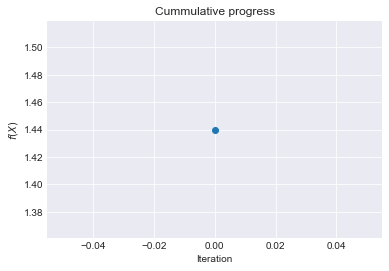

Please perform the following experiment:
x1: 6.0000001
x2: 6.0


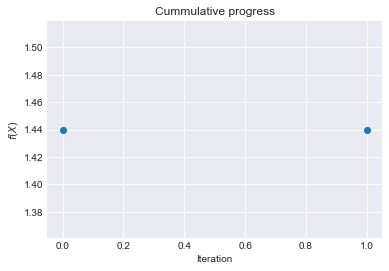

Please perform the following experiment:
x1: 6.0
x2: 6.0000001


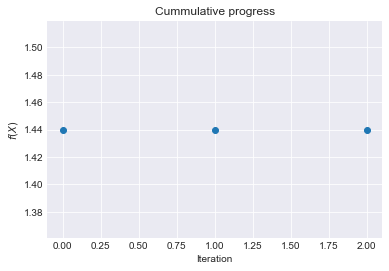

Please perform the following experiment:
x1: 5.759999945288209
x2: 5.759999945288209


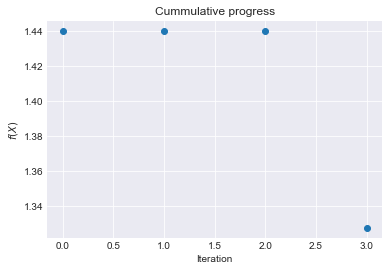

Please perform the following experiment:
x1: 5.760000045288209
x2: 5.759999945288209


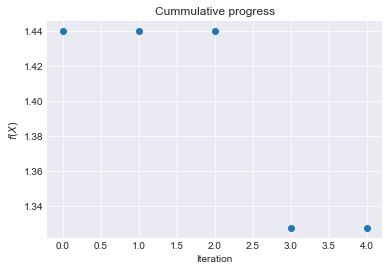

Please perform the following experiment:
x1: 5.759999945288209
x2: 5.760000045288209


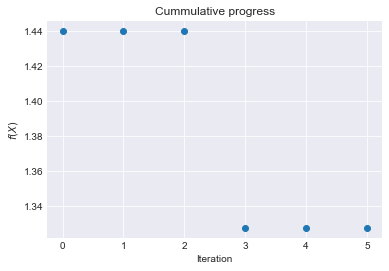

Please perform the following experiment:
x1: 4.607999764384022
x2: 4.607999675566181


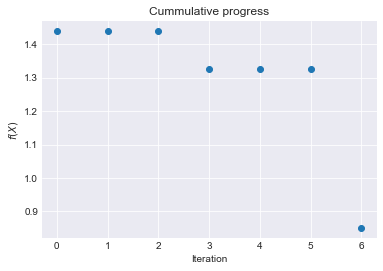

Please perform the following experiment:
x1: 4.6079998643840225
x2: 4.607999675566181


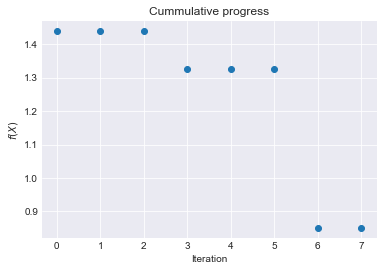

Please perform the following experiment:
x1: 4.607999764384022
x2: 4.6079997755661815


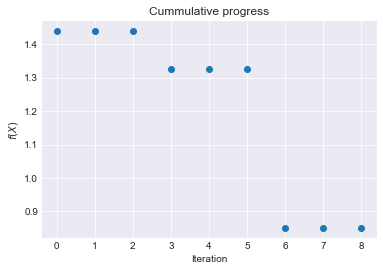

Please perform the following experiment:
x1: 2.2914980313260003e-06
x2: 2.451370037626077e-06


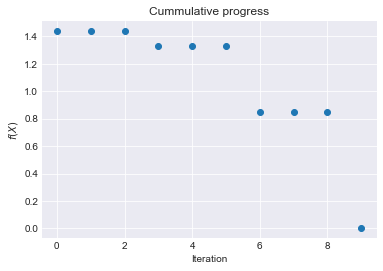

Please perform the following experiment:
x1: 2.391498031326e-06
x2: 2.451370037626077e-06


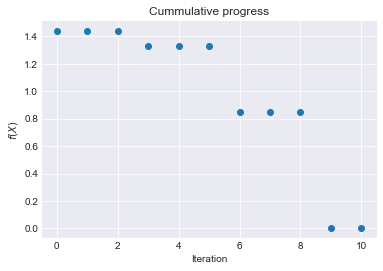

Please perform the following experiment:
x1: 2.2914980313260003e-06
x2: 2.551370037626077e-06


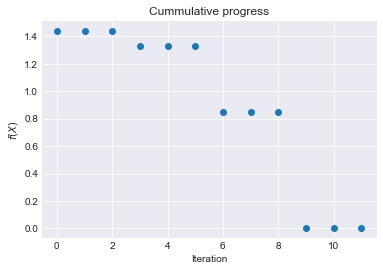

     fun: array([2.3133774e-13])
     jac: array([4.09213582e-08, 2.00793365e-07])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([2.29149803e-06, 2.45137004e-06])


In [4]:
bnd_list = []
for var, bound in bounds.items():
    bnd_list.append(bound)
    
dim = len(bnd_list)

X_store = []
Y_store = []
def user_input(X, opt_type, bounds, plot=True):
    global X_store
    global Y_store
    X_store.append(X)
    print("Please perform the following experiment:")
    for name, value in zip(bounds.keys(), X):
        print(name + ": " + str(value))
        
    while True:
        try:
            y = input('Please input response: ')
            if y == 'Exit':
                return 'a'
            Y_store.append(float(y))
            break
        except:
            print("Please enter a valid numeric value")
            
    if plot:
        if opt_type == "min":
            plt.scatter(np.arange(len(Y_store)), np.minimum.accumulate(Y_store))
            plt.title("Cummulative progress")
            plt.xlabel("Iteration")
            plt.ylabel(r"$f(X)$")
            plt.show()
        else:
            plt.scatter(np.arange(len(Y_store)), np.maximum.accumulate(Y_store))
            plt.title("Cummulative progress")
            plt.show()        
            
    return np.array(float(y)).reshape(-1) if opt_type == 'min' else - np.array(float(y)).reshape(-1)

func = lambda x: user_input(x, opt_type, bounds, plot)
try:
    result = minimize(func, x0=np.array(initial_guess), method='SLSQP', bounds=bnd_list, options={'eps':eps, 'ftol': tolerance})
    print(result)
except:
    print('Premature termination, find progress in X_store and Y_store')
    print("X_store")
    print(X_store)
    print("Y_store")
    print(Y_store)